 # KMPG Data Insights of `Sprocket Central Pty Ltd`
 ## (By Youssef Hussein Ahmed)
 
 ### Connect with me:
[<img align="left" width="35px" style= "padding-right: 10px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/linkedin.svg" />][linkedin]
[<img align="left" width="35px" style= "padding-right: 10px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/upwork.svg" />][upwork]
[<img align="left" width="35px" style= "padding-right: 10px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/github.svg" />][github]
[<img align="left" width="35px" style= "padding-right: 10px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/facebook.svg" />][facebook]

[linkedin]: https://www.linkedin.com/in/just-youssef
[upwork]: https://www.upwork.com/freelancers/~01bf41aeaec6f293c5
[github]: https://github.com/just-youssef
[facebook]: https://www.facebook.com/just.johnny99

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load the datasets
demo = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'CustomerDemographic')
add = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'CustomerAddress')
trans = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'Transactions') 

# Data Cleaning

## CustomerDemographic

In [3]:
demo.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0


### Check data types

In [4]:
demo.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
default                                        object
owns_car                                       object
tenure                                        float64
dtype: object

In [5]:
demo.gender.value_counts()

Female    2037
Male      1872
U           88
Femal        1
F            1
M            1
Name: gender, dtype: int64

In [6]:
demo['gender'] = demo.gender.apply(lambda x: 'Male' if x in ['Male', 'M'] else ('Female' if x in ['Female', 'Femal', 'F'] else 'Unknown'))
demo.gender.value_counts()

Female     2039
Male       1873
Unknown      88
Name: gender, dtype: int64

In [7]:
demo.drop(['default', 'tenure'], axis='columns', inplace= True)

### Check Missing Values

In [8]:
demo.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
dtype: int64

- Ignore `last_name` missings since it's not useful for the analysis
- Drop rows with missing `DOB`
- Since `job_title` has too many categories that would be not useful for the analysis. We can Ignore these missings or fill with `mode` value
- Fill `job_industry_category` with `mode` value

In [9]:
demo.drop(demo[demo.DOB.isna()].index, axis= 'index', inplace= True)

In [10]:
demo.job_title.fillna(demo.job_title.mode()[1], inplace= True)

In [11]:
demo.job_industry_category.fillna(demo.job_industry_category.mode()[0], inplace= True)

### Check Duplicated Values

In [12]:
demo.customer_id.duplicated().sum()

0

### Insert necessary columns

In [13]:
demo['age'] = (pd.Timestamp('now') - demo.DOB).astype('<m8[Y]') 

In [14]:
demo.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,67.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,40.0


## CustomerAddress

In [15]:
add.head(2)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10


### Check Data types

In [16]:
add.dtypes

customer_id            int64
address               object
postcode               int64
state                 object
country               object
property_valuation     int64
dtype: object

In [17]:
add.state.value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [18]:
add['state'] = add.state.apply(lambda x: 'NSW' if x in ['New South Wales', 'NSW'] else ('VIC' if x in ['Victoria ', 'VIC'] else 'QLD'))
add.state.value_counts()

NSW    2140
VIC     939
QLD     920
Name: state, dtype: int64

### Check Missing Values

In [19]:
add.isna().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

all sounds good!

### Check Duplicated Values

In [20]:
add.duplicated().sum()

0

all sounds good!

In [21]:
add.head(2)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10


### We can join `CustomerDemographic` and `CustomerAddress` into single dataset `Customer`

In [22]:
# customer dataset
cust = demo.join(add.set_index('customer_id'), on='customer_id')
cust.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,age,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,67.0,060 Morning Avenue,2016.0,NSW,Australia,10.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,40.0,6 Meadow Vale Court,2153.0,NSW,Australia,10.0


## Transactions

In [23]:
trans.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0


### Check Data Types

In [24]:
trans.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

all sounds good!

### Check Missing Values

In [25]:
trans.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [26]:
trans.shape

(20000, 13)

simply we can drop transactions that have missing values

In [27]:
trans.dropna(inplace= True)

### Check Duplicated Values

In [28]:
trans.duplicated().sum()

0

all sounds good!

# Data Exploration

## What is/are the main feature(s) of interest in your dataset?
#### For **Customer** dataset:
- gender
- past_3_years_bike_related_purchases
- job_industry_category
- wealth_segment
- deceased_indicator
- owns_car
- age
- state
- property_valuation

#### For **Transactions** dataset:
- brand
- product_line
- product_class
- product_size
- list_price
- standard_cost

## Customer dataset

In [29]:
cust.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,age,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,67.0,060 Morning Avenue,2016.0,NSW,Australia,10.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,40.0,6 Meadow Vale Court,2153.0,NSW,Australia,10.0


In [30]:
cust.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
age                                           float64
address                                        object
postcode                                      float64
state                                          object
country                                        object
property_valuation                            float64
dtype: object

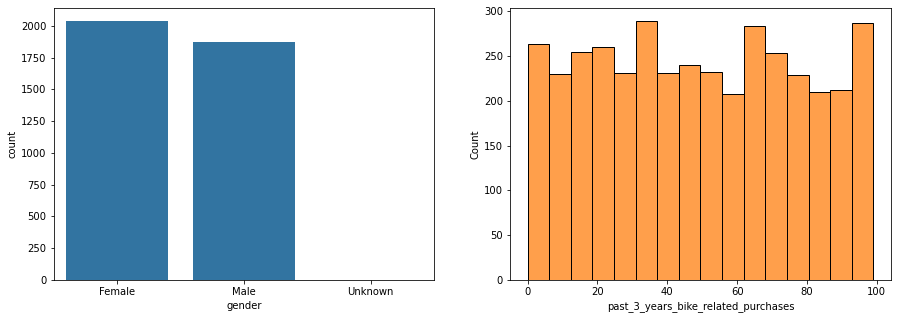

In [31]:
plt.figure(figsize=(15,5))

# explore gender
plt.subplot(1,2,1)
sb.countplot(data= cust, x= 'gender', color= sb.color_palette()[0])

# explore past_3_years_bike_related_purchases
plt.subplot(1,2,2)
sb.histplot(cust.past_3_years_bike_related_purchases, color= sb.color_palette()[1]);

- `gender` exploration shows that gender has no critical effect on customers number. Although the number of female customers are slightly greater than male customer.
- `past_3_years_bike related purchases` exploration shows that customers purchases during the past 3 years are varying according to some unknown pattern that we hope to discover.

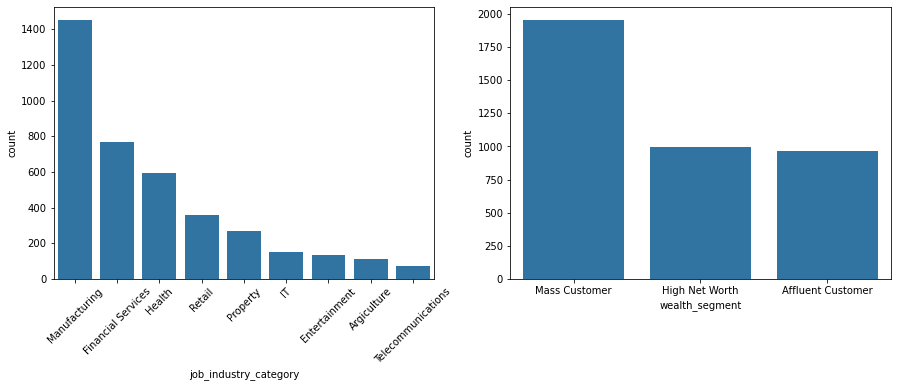

In [32]:
plt.figure(figsize=(15,5))

# explore job_industry_category
plt.subplot(1,2,1)
job_cat_order = cust.job_industry_category.value_counts().index
sb.countplot(data= cust, x= 'job_industry_category', color= sb.color_palette()[0], order= job_cat_order)
plt.xticks(rotation= 45);

# explore wealth_segment
plt.subplot(1,2,2)
wealth_order = cust.wealth_segment.value_counts().index
sb.countplot(data= cust, x= 'wealth_segment', color= sb.color_palette()[0], order= wealth_order);

`job_industry_category` exploration shows that:
- The great proportion of customers (more than 1400 customer) are working in **Manufacturing**.
- The second highest proportion of customers (less than 800 customer) are working in **Financial Services**.
- The least proportion of customers are working in **Telecommunications**.

`wealth_segment` exploration shows that:
- Nearly more than half customers are **Mass Customers**.
- The proportion of **High Net Worth** customers and **Affluent Customers** are nearly the same.

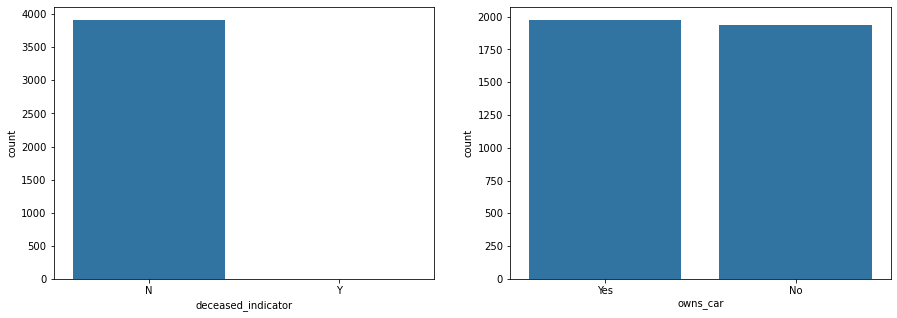

In [33]:
plt.figure(figsize=(15,5))

# explore deceased_indicator
plt.subplot(1,2,1)
indicator_order = cust.deceased_indicator.value_counts().index
sb.countplot(data= cust, x= 'deceased_indicator', color= sb.color_palette()[0], order= indicator_order)

# explore owns_car
plt.subplot(1,2,2)
owns_car_order = cust.owns_car.value_counts().index
sb.countplot(data= cust, x= 'owns_car', color= sb.color_palette()[0], order= owns_car_order);

- `deceased_indicator` exploration naturally shows that nearly all customers during the past 3 years are not dead by now.
- As not expected `owns_car` exploration shows that the proportion of customers who own cars are nearly same as the customers who don't.

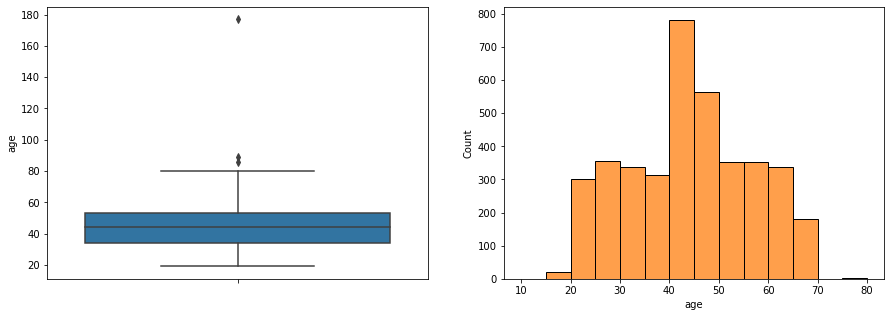

In [34]:
plt.figure(figsize=(15,5))

# check age outliers
plt.subplot(1,2,1)
sb.boxplot(y= cust.age)
age_bins = np.arange(10, 85, 5)

# explore age
plt.subplot(1,2,2)
sb.histplot(cust.age, color= sb.color_palette()[1], bins= age_bins);

`age` exploration shows that the great proportion of customers have ages between 40 to 50 years old.

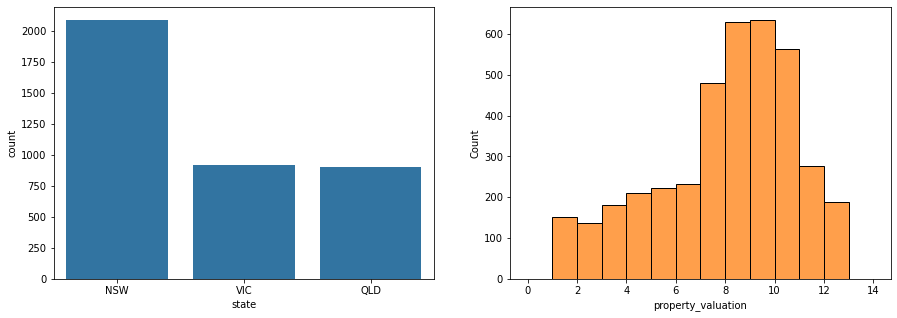

In [35]:
plt.figure(figsize=(15,5))

# explore state
plt.subplot(1,2,1)
state_order = cust.state.value_counts().index
sb.countplot(data= cust, x= 'state', color= sb.color_palette()[0], order= state_order)

# explore property_valuation
prop_bins = np.arange(0, 15, 1)
plt.subplot(1,2,2)
sb.histplot(cust.property_valuation, color= sb.color_palette()[1], bins= prop_bins);

- `state` exploration shows that the great proportion of customers (more than 2000) are from **NSW**.
- `property_valuation` exploration shows that the great proportion of customers have property property_valuation value between 7 to 12.

## Transactions

In [36]:
trans.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0


In [37]:
trans.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

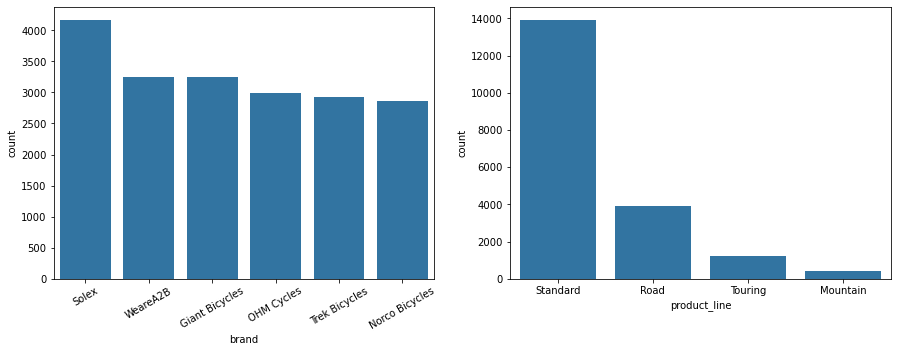

In [43]:
plt.figure(figsize=(15,5))

# explore brand
plt.subplot(1,2,1)
brand_order = trans.brand.value_counts().index
sb.countplot(data= trans, x= 'brand', color= sb.color_palette()[0], order= brand_order)
plt.xticks(rotation= 30)

#explore product_line
plt.subplot(1,2,2)
line_order = trans.product_line.value_counts().index
sb.countplot(data= trans, x= 'product_line', color= sb.color_palette()[0], order= line_order);

- `brand` exploration shows that **Solex** products have the greatest number of transactions, while rest of brands have convergent numbers of transactions.
- `product_line` exploration shows that **Standard** product line products have the greatest proportion of transactions.

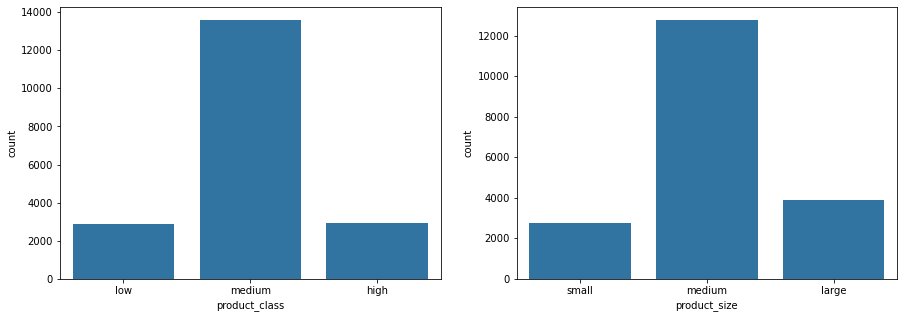

In [47]:
plt.figure(figsize=(15,5))

# explore product_class
plt.subplot(1,2,1)
class_order = ['low', 'medium', 'high']
sb.countplot(data= trans, x= 'product_class', color= sb.color_palette()[0], order= class_order)

# explore product_size
plt.subplot(1,2,2)
size_order = ['small', 'medium', 'large']
sb.countplot(data= trans, x= 'product_size', color= sb.color_palette()[0], order= size_order);

`product_class` and `product_size` explorations show that products with medium sizes and classes have the greatest proportion of transactions.

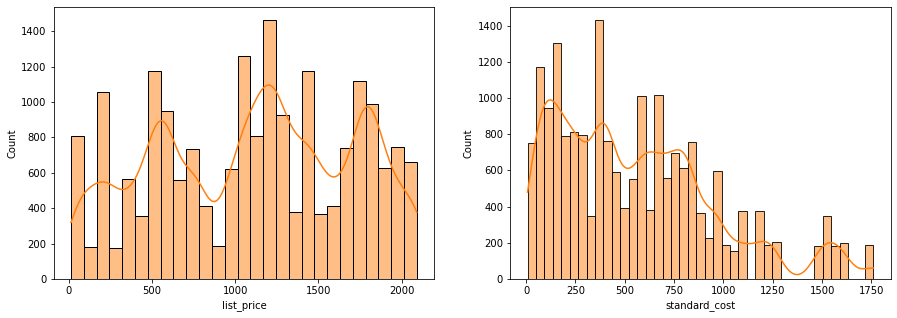

In [61]:
plt.figure(figsize=(15,5))

# explore list_price
plt.subplot(1,2,1)
sb.histplot(trans.list_price, color= sb.color_palette()[1], kde= True)

# explore standard_cost
cost_bins = np.arange(0, 15, 1)
plt.subplot(1,2,2)
sb.histplot(trans.standard_cost, color= sb.color_palette()[1], kde= True);

- `list_price` exploration shows that products prices have no critical effect on transactions.
- `standard_cost` exploration shows that products that have the greatest proportion of transactions have low standard cost and whenever the `standard_cost` increase the number of transactions decrease.